In [1]:
from __future__ import annotations

import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
from coffea import nanoevents

plt.style.use(hep.style.CMS)
hep.style.use("CMS")
plt.rcParams.update({"font.size": 16})

In [2]:
events = nanoevents.NanoEventsFactory.from_root(
    "/uscms/home/rkansal/lpcdihiggsboost/MINIAOD/ParTSamples/v1/BulkGravitonToHHTo4W_MX-Var_MH-260to650_JHUVariableWMass/20UL17MiniAODv2/*.root",
    "Events",
    permit_dask=True,
    schemaclass=nanoevents.NanoAODSchema,
).events()

/uscms_data/d3/rkansal/mambaforge/envs/coffea23/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:215: RuntimeWarning: Missing cross-reference index for Electron_genPartIdx => GenPart
  warnings.warn(
/uscms_data/d3/rkansal/mambaforge/envs/coffea23/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:215: RuntimeWarning: Missing cross-reference index for Electron_jetIdx => Jet
  warnings.warn(
/uscms_data/d3/rkansal/mambaforge/envs/coffea23/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:215: RuntimeWarning: Missing cross-reference index for Electron_photonIdx => Photon
  warnings.warn(
/uscms_data/d3/rkansal/mambaforge/envs/coffea23/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:215: RuntimeWarning: Missing cross-reference index for FatJet_genJetAK8Idx => GenJetAK8
  warnings.warn(
/uscms_data/d3/rkansal/mambaforge/envs/coffea23/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:215: RuntimeWarning: Missing cr

In [3]:
HIGGS_PDGID = 25
GRAV_PDGID = 39

GEN_FLAGS = ["fromHardProcess", "isLastCopy"]

In [4]:
higgs = events.GenPart[
    (abs(events.GenPart.pdgId) == HIGGS_PDGID) * events.GenPart.hasFlags(GEN_FLAGS)
]

grav = events.GenPart[
    (abs(events.GenPart.pdgId) == GRAV_PDGID) * events.GenPart.hasFlags(GEN_FLAGS)
]

In [5]:
m = np.array(higgs.mass.compute())[:, 0]

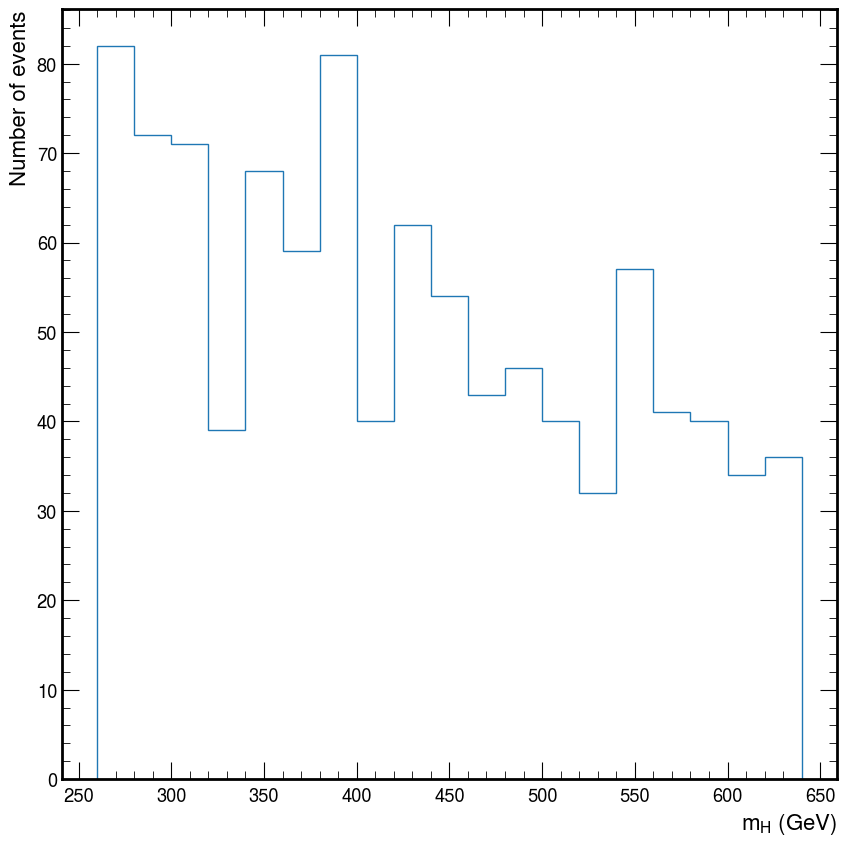

In [6]:
plt.hist(m, np.arange(260, 660, 20), histtype="step")
plt.xlabel(r"$m_H$ (GeV)")
plt.ylabel("Number of events")
plt.show()

In [7]:
g = np.array(grav.mass.compute())[:, 0]

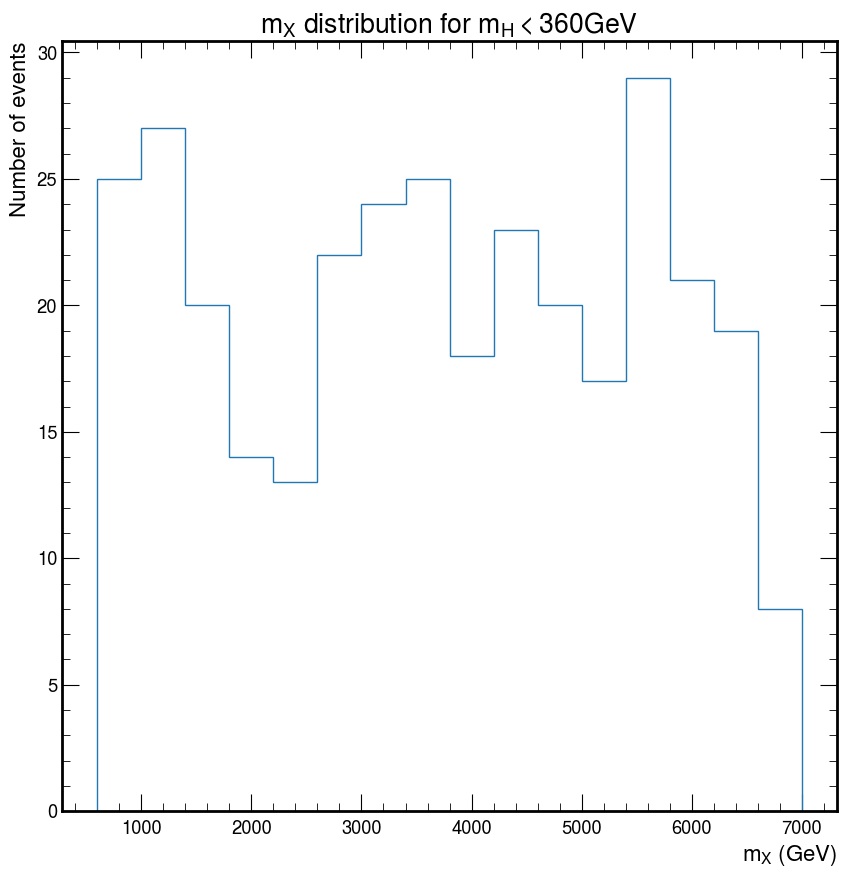

In [8]:
_ = plt.hist(g[m < 360], np.arange(600, 7400, 400), histtype="step")
plt.title(r"$m_X$ distribution for $m_H < 360 GeV$")
plt.xlabel(r"$m_X$ (GeV)")
plt.ylabel("Number of events")
plt.show()

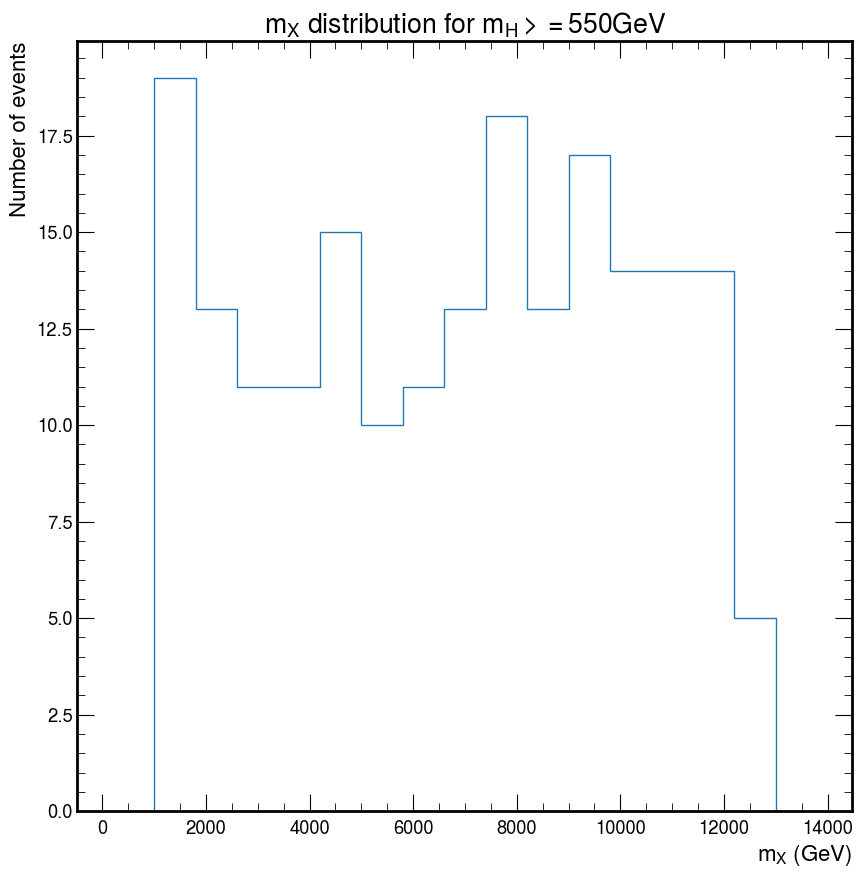

In [9]:
_ = plt.hist(g[m >= 550], np.arange(200, 14000, 800), histtype="step")
plt.title(r"$m_X$ distribution for $m_H >= 550 GeV$")
plt.xlabel(r"$m_X$ (GeV)")
plt.ylabel("Number of events")
plt.show()